In [75]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd
from textblob import TextBlob

In [11]:
data = pd.read_csv("posts.csv")
data.head()

,__v,_id,categories,createdAt,desc,photo,title,updatedAt,username
0,0,64247286ce310cf53fe3a32c,[],2023-03-29T17:16:54.792Z,While COVID-19 symptoms may pass quickly for s...,1680110214211Top questions doctors are getting...,Long COVID: Post-COVID Syndrome,2023-03-29T17:33:08.239Z,Kimberly Marcelin Nathan
1,0,64247385ce310cf53fe3a332,[],2023-03-29T17:21:09.360Z,This post is part of a Health Affairs Blog sho...,1680110468784health-affairs-covid-19-stories_b...,Stories Of COVID - 19 - Caring For The Caregivers,2023-04-02T18:48:17.465Z,Kimberly Marcelin Nathan
2,0,642477e0ce310cf53fe3a362,[],2023-03-29T17:39:44.262Z,"Post-COVID unhappiness\nAcross the board, ever...",1680111583931Mental-health-during-COVID-19-Blo...,How COVID-19 impacted employee wellness,2023-03-29T17:39:44.262Z,Kimberly Marcelin Nathan
3,0,642b168448db562e66543e9b,[],2023-04-03T18:10:12.213Z,"An incubation period is the duration between ""...",16805454111796a62c511-7578-4ec3-8d74-66657d175...,Incubation period of COVID-19,2023-04-03T18:10:12.213Z,Jim Gilmour
4,0,642b177948db562e66543ea0,[],2023-04-03T18:14:17.430Z,A systematic review and meta-analysis of 148 s...,1680545656390glowing-purple-virus-concept-vect...,Prevalence of Coronavirus (COVID-19) symptoms,2023-04-03T18:14:17.430Z,Jim Gilmour


In [13]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Preprocessing

In [14]:
# Load data into a pandas dataframe
df = pd.read_csv('posts.csv')

# Fetch the blog column from the dataframe
blogs = df['desc']

# Define a function to preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers and punctuation
    text = text.replace('\d+', '').replace('[^\w\s]', '')
    
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    text = ' '.join(words)
    
    return text

# Apply the preprocessing function to the blog column of the dataframe
preprocessed_blogs = blogs.apply(preprocess_text)

# Add the preprocessed blog column to the original dataframe
df['blog_preprocessed'] = preprocessed_blogs

In [15]:
df.head()

,__v,_id,categories,createdAt,desc,photo,title,updatedAt,username,blog_preprocessed
0,0,64247286ce310cf53fe3a32c,[],2023-03-29T17:16:54.792Z,While COVID-19 symptoms may pass quickly for s...,1680110214211Top questions doctors are getting...,Long COVID: Post-COVID Syndrome,2023-03-29T17:33:08.239Z,Kimberly Marcelin Nathan,"covid-19 symptom may pas quickly people , mill..."
1,0,64247385ce310cf53fe3a332,[],2023-03-29T17:21:09.360Z,This post is part of a Health Affairs Blog sho...,1680110468784health-affairs-covid-19-stories_b...,Stories Of COVID - 19 - Caring For The Caregivers,2023-04-02T18:48:17.465Z,Kimberly Marcelin Nathan,"post part health affair blog short series , “ ..."
2,0,642477e0ce310cf53fe3a362,[],2023-03-29T17:39:44.262Z,"Post-COVID unhappiness\nAcross the board, ever...",1680111583931Mental-health-during-COVID-19-Blo...,How COVID-19 impacted employee wellness,2023-03-29T17:39:44.262Z,Kimberly Marcelin Nathan,"post-covid unhappiness across board , everyone..."
3,0,642b168448db562e66543e9b,[],2023-04-03T18:10:12.213Z,"An incubation period is the duration between ""...",16805454111796a62c511-7578-4ec3-8d74-66657d175...,Incubation period of COVID-19,2023-04-03T18:10:12.213Z,Jim Gilmour,incubation period duration `` ever close conta...
4,0,642b177948db562e66543ea0,[],2023-04-03T18:14:17.430Z,A systematic review and meta-analysis of 148 s...,1680545656390glowing-purple-virus-concept-vect...,Prevalence of Coronavirus (COVID-19) symptoms,2023-04-03T18:14:17.430Z,Jim Gilmour,systematic review meta-analysis 148 study 9 co...


In [26]:
import pandas as pd
from textblob import TextBlob


# Fetch the preprocessed blog data.
preprocessed_blogs = df['blog_preprocessed']

# Create an empty list to store sentiment values.
sentiments = []

# Loop through each blog post and perform sentiment analysis.
for blog in preprocessed_blogs:
    # Create a TextBlob object for the blog post.
    blob = TextBlob(blog)
    # Get the sentiment polarity (-1 to 1).
    sentiment = blob.sentiment.polarity
    # Append the sentiment value to the list.
    sentiments.append(sentiment)

# Add the sentiment column to the dataframe.
df['sentiment'] = sentiments

# Save the updated dataframe to a new CSV file.
df.to_csv('your_dataframe_with_sentiment.csv', index=False)

In [27]:
df.head()

,__v,_id,categories,createdAt,desc,photo,title,updatedAt,username,blog_preprocessed,sentiment
0,0,64247286ce310cf53fe3a32c,[],2023-03-29T17:16:54.792Z,While COVID-19 symptoms may pass quickly for s...,1680110214211Top questions doctors are getting...,Long COVID: Post-COVID Syndrome,2023-03-29T17:33:08.239Z,Kimberly Marcelin Nathan,"covid-19 symptom may pas quickly people , mill...",0.066883
1,0,64247385ce310cf53fe3a332,[],2023-03-29T17:21:09.360Z,This post is part of a Health Affairs Blog sho...,1680110468784health-affairs-covid-19-stories_b...,Stories Of COVID - 19 - Caring For The Caregivers,2023-04-02T18:48:17.465Z,Kimberly Marcelin Nathan,"post part health affair blog short series , “ ...",0.112265
2,0,642477e0ce310cf53fe3a362,[],2023-03-29T17:39:44.262Z,"Post-COVID unhappiness\nAcross the board, ever...",1680111583931Mental-health-during-COVID-19-Blo...,How COVID-19 impacted employee wellness,2023-03-29T17:39:44.262Z,Kimberly Marcelin Nathan,"post-covid unhappiness across board , everyone...",0.061746
3,0,642b168448db562e66543e9b,[],2023-04-03T18:10:12.213Z,"An incubation period is the duration between ""...",16805454111796a62c511-7578-4ec3-8d74-66657d175...,Incubation period of COVID-19,2023-04-03T18:10:12.213Z,Jim Gilmour,incubation period duration `` ever close conta...,0.007920
4,0,642b177948db562e66543ea0,[],2023-04-03T18:14:17.430Z,A systematic review and meta-analysis of 148 s...,1680545656390glowing-purple-virus-concept-vect...,Prevalence of Coronavirus (COVID-19) symptoms,2023-04-03T18:14:17.430Z,Jim Gilmour,systematic review meta-analysis 148 study 9 co...,-0.003577


After preprocessing the blog data, you can use it for further analysis or modeling. Here are a few examples:

Sentiment analysis: You can use the preprocessed blog data to perform sentiment analysis and determine whether the blog is positive, negative, or neutral in sentiment. You can use machine learning models like logistic regression, decision trees, or support vector machines to train a model on preprocessed blog data and their corresponding sentiment labels.

Topic modeling: You can use the preprocessed blog data to identify the topics discussed in the blogs. You can use unsupervised machine learning techniques like Latent Dirichlet Allocation (LDA) to identify the underlying topics in the preprocessed blog data.

Keyword extraction: You can use the preprocessed blog data to extract the most frequently used keywords in the blogs. You can use libraries like TextBlob or spaCy to extract the most frequently used keywords in the preprocessed blog data.

Content summarization: You can use the preprocessed blog data to generate a summary of the content of the blog. You can use techniques like TextRank or Latent Semantic Analysis (LSA) to generate a summary of the preprocessed blog data.

# Sentiment analysis

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer

# Fetch the preprocessed blog data.
preprocessed_blogs = df['blog_preprocessed']

# Create a count vectorizer to convert the preprocessed blogs to numerical features.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_blogs)

# Define the target variable as the sentiment values.
y = df['sentiment'].values

# Split the data into training and testing sets.
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create a linear regression model and fit it to the training data.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the sentiment values for the test data.
y_pred = lr.predict(X_test)

# Evaluate the performance of the model.
score = lr.score(X_test, y_test)
print('R-squared score:', score)

R-squared score: 0.11168918470761713


In [46]:
import pandas as pd
from textblob import TextBlob
import textstat

# Define positive and negative words
positive_words = ['good', 'great', 'excellent', 'awesome', 'fantastic', 'terrific', 'amazing', 'love', 'like']
negative_words = ['bad', 'terrible', 'awful', 'horrible', 'poor', 'disappointing', 'hate', 'dislike']


# Define function to calculate sentiment polarity
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity

# Define function to map polarity to sentiment
def get_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Perform sentiment analysis
df['sentiment_polarity'] = df['blog_preprocessed'].apply(get_sentiment_polarity)
df['sentiment'] = df['sentiment_polarity'].apply(get_sentiment)

# Print summary of sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Define function to calculate Flesch Reading Ease score
def get_readability_score(text):
    score = textstat.flesch_reading_ease(text)
    return score

# Calculate Flesch Reading Ease score for each blog post
df['readability_score'] = df['blog_preprocessed'].apply(get_readability_score)

# Print summary statistics of Flesch Reading Ease scores
print(df['readability_score'].describe())

positive    10
negative     2
Name: sentiment, dtype: int64
count    12.000000
mean     31.372500
std      10.209565
min      17.300000
25%      25.632500
50%      29.635000
75%      35.712500
max      51.550000
Name: readability_score, dtype: float64


In [56]:
df.head()

,__v,_id,categories,createdAt,desc,photo,title,updatedAt,username,blog_preprocessed,sentiment,blog_length,sentiment_polarity,num_positive_words,num_negative_words,reading_ease,readability_score
0,0,64247286ce310cf53fe3a32c,[],2023-03-29T17:16:54.792Z,While COVID-19 symptoms may pass quickly for s...,1680110214211Top questions doctors are getting...,Long COVID: Post-COVID Syndrome,2023-03-29T17:33:08.239Z,Kimberly Marcelin Nathan,"covid-19 symptom may pas quickly people , mill...",positive,2985,0.066883,13,46,33.31,33.31
1,0,64247385ce310cf53fe3a332,[],2023-03-29T17:21:09.360Z,This post is part of a Health Affairs Blog sho...,1680110468784health-affairs-covid-19-stories_b...,Stories Of COVID - 19 - Caring For The Caregivers,2023-04-02T18:48:17.465Z,Kimberly Marcelin Nathan,"post part health affair blog short series , “ ...",positive,8126,0.112265,97,74,51.55,51.55
2,0,642477e0ce310cf53fe3a362,[],2023-03-29T17:39:44.262Z,"Post-COVID unhappiness\nAcross the board, ever...",1680111583931Mental-health-during-COVID-19-Blo...,How COVID-19 impacted employee wellness,2023-03-29T17:39:44.262Z,Kimberly Marcelin Nathan,"post-covid unhappiness across board , everyone...",positive,3678,0.061746,43,30,26.47,26.47
3,0,642b168448db562e66543e9b,[],2023-04-03T18:10:12.213Z,"An incubation period is the duration between ""...",16805454111796a62c511-7578-4ec3-8d74-66657d175...,Incubation period of COVID-19,2023-04-03T18:10:12.213Z,Jim Gilmour,incubation period duration `` ever close conta...,positive,1750,0.007920,4,48,23.12,23.12
4,0,642b177948db562e66543ea0,[],2023-04-03T18:14:17.430Z,A systematic review and meta-analysis of 148 s...,1680545656390glowing-purple-virus-concept-vect...,Prevalence of Coronavirus (COVID-19) symptoms,2023-04-03T18:14:17.430Z,Jim Gilmour,systematic review meta-analysis 148 study 9 co...,negative,2073,-0.003577,7,35,42.98,42.98


In [58]:
# Create a dictionary to map sentiment labels to numerical values
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}

# Encode the sentiment column using the sentiment_map dictionary
df['sentiment_encoded'] = df['sentiment'].map(sentiment_map)

# Print the first 5 rows of the encoded data
df.head()

,__v,_id,categories,createdAt,desc,photo,title,updatedAt,username,blog_preprocessed,sentiment,blog_length,sentiment_polarity,num_positive_words,num_negative_words,reading_ease,readability_score,sentiment_encoded
0,0,64247286ce310cf53fe3a32c,[],2023-03-29T17:16:54.792Z,While COVID-19 symptoms may pass quickly for s...,1680110214211Top questions doctors are getting...,Long COVID: Post-COVID Syndrome,2023-03-29T17:33:08.239Z,Kimberly Marcelin Nathan,"covid-19 symptom may pas quickly people , mill...",positive,2985,0.066883,13,46,33.31,33.31,1
1,0,64247385ce310cf53fe3a332,[],2023-03-29T17:21:09.360Z,This post is part of a Health Affairs Blog sho...,1680110468784health-affairs-covid-19-stories_b...,Stories Of COVID - 19 - Caring For The Caregivers,2023-04-02T18:48:17.465Z,Kimberly Marcelin Nathan,"post part health affair blog short series , “ ...",positive,8126,0.112265,97,74,51.55,51.55,1
2,0,642477e0ce310cf53fe3a362,[],2023-03-29T17:39:44.262Z,"Post-COVID unhappiness\nAcross the board, ever...",1680111583931Mental-health-during-COVID-19-Blo...,How COVID-19 impacted employee wellness,2023-03-29T17:39:44.262Z,Kimberly Marcelin Nathan,"post-covid unhappiness across board , everyone...",positive,3678,0.061746,43,30,26.47,26.47,1
3,0,642b168448db562e66543e9b,[],2023-04-03T18:10:12.213Z,"An incubation period is the duration between ""...",16805454111796a62c511-7578-4ec3-8d74-66657d175...,Incubation period of COVID-19,2023-04-03T18:10:12.213Z,Jim Gilmour,incubation period duration `` ever close conta...,positive,1750,0.007920,4,48,23.12,23.12,1
4,0,642b177948db562e66543ea0,[],2023-04-03T18:14:17.430Z,A systematic review and meta-analysis of 148 s...,1680545656390glowing-purple-virus-concept-vect...,Prevalence of Coronavirus (COVID-19) symptoms,2023-04-03T18:14:17.430Z,Jim Gilmour,systematic review meta-analysis 148 study 9 co...,negative,2073,-0.003577,7,35,42.98,42.98,-1


Feature engineering: Instead of using the preprocessed blog text as the only input feature, you can try to extract additional features that might be relevant for sentiment analysis. For example, you can extract features such as the length of the blog, the number of positive/negative words in the blog, or the readability score of the blog.

Hyperparameter tuning: Linear regression has a few hyperparameters that can be tuned to improve its performance. For example, you can try different regularization parameters (such as L1 or L2 

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from nltk.corpus import opinion_lexicon


# Define positive and negative word lists
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Perform feature engineering
df['blog_length'] = df['blog_preprocessed'].apply(len)
df['num_positive_words'] = df['blog_preprocessed'].apply(lambda x: len([w for w in x.split() if w in positive_words]))
df['num_negative_words'] = df['blog_preprocessed'].apply(lambda x: len([w for w in x.split() if w in negative_words]))
df['readability_score'] = df['blog_preprocessed'].apply(get_readability_score)

# Define features and target variable
X = df[['blog_length', 'num_positive_words', 'num_negative_words', 'readability_score']]
y = df['sentiment_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate model performance
y_pred_train = lr.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("Training MSE: {:.3f}".format(train_mse))

y_pred_test = lr.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Testing MSE: {:.3f}".format(test_mse))

score = lr.score(X_test, y_test)
print('R-squared score:', score)

Training MSE: 0.055
Testing MSE: 0.572
R-squared score: 0.3559616002596936


Use a different sentiment lexicon: The current sentiment lexicon is the opinion lexicon from NLTK, which may not be the best fit for the blog data. You could try using a different sentiment lexicon or even creating your own.
Use a different feature set: The current feature set only includes the length of the blog post, the number of positive words, the number of negative words, and the readability score. You could try adding more features, such as the number of adjectives, the number of exclamation marks, or the number of unique words.

In [76]:
from sklearn.ensemble import RandomForestRegressor
# Fit random forest regressor model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Evaluate model performance
y_pred_train = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("Training MSE: {:.3f}".format(train_mse))

y_pred_test = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Testing MSE: {:.3f}".format(test_mse))

score = rfr.score(X_test, y_test)
print('R-squared score:', score)

Training MSE: 0.109
Testing MSE: 0.297
R-squared score: 0.66625


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.corpus import opinion_lexicon


# Define positive and negative word lists
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Perform feature engineering
df['blog_length'] = df['blog_preprocessed'].apply(len)
df['num_positive_words'] = df['blog_preprocessed'].apply(lambda x: len([w for w in x.split() if w in positive_words]))
df['num_negative_words'] = df['blog_preprocessed'].apply(lambda x: len([w for w in x.split() if w in negative_words]))
df['readability_score'] = df['blog_preprocessed'].apply(get_readability_score)

# Define features and target variable
X = df[['blog_length', 'num_positive_words', 'num_negative_words', 'readability_score']]
y = df['sentiment_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Fit Random Forest Regressor with Grid Search Cross Validation
rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

# Evaluate model performance
y_pred_train = rf_cv.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
print("Training MSE: {:.3f}".format(train_mse))
print("Training R-squared: {:.3f}".format(train_r2))

y_pred_test = rf_cv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Testing MSE: {:.3f}".format(test_mse))
print("Testing R-squared: {:.3f}".format(test_r2))

Training MSE: 0.095
Training R-squared: 0.760
Testing MSE: 0.236
Testing R-squared: 0.735


#Topic modeling 

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Fetch the preprocessed blog data
preprocessed_blogs = df['blog_preprocessed']

# Create a CountVectorizer object
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the preprocessed blog data to a document-term matrix
doc_term_matrix = count_vectorizer.fit_transform(preprocessed_blogs)

# Define the number of topics
num_topics = 5

# Create a LatentDirichletAllocation object
lda_model = LatentDirichletAllocation(n_components=num_topics)

# Fit the LDA model to the document-term matrix
lda_model.fit(doc_term_matrix)

# Print the top 10 words for each topic
for i, topic in enumerate(lda_model.components_):
    print("Topic {}: ".format(i+1))
    top_words_idx = topic.argsort()[-10:]
    top_words = [count_vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(top_words)
    print("\n")

Topic 1: 
['issued', 'personal', 'home', 'covid', '19', 'fraud', 'offering', 'information', 'help', 'grant']


Topic 2: 
['industry', 'loss', 'plan', 'health', 'india', 'claim', 'policy', '19', 'insurance', 'covid']


Topic 3: 
['company', 'labourer', 'lockdown', 'people', 'situation', 'job', 'covid', '19', 'industry', 'pandemic']


Topic 4: 
['room', 'death', 'like', 'icu', 'new', 'time', 'care', 'covid', '19', 'patient']


Topic 5: 
['india', 'pandemic', 'make', 'health', 'people', 'symptom', '19', 'long', 'vaccine', 'covid']




# Keyword extraction

In [92]:
#nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [93]:
from textblob import TextBlob

# Fetch the preprocessed blog data
preprocessed_blogs = df['blog_preprocessed']

# Extract the top keywords from each blog
for i, blog in enumerate(preprocessed_blogs):
    blob = TextBlob(blog)
    keywords = blob.noun_phrases[:5]
    print("Blog {}: {}".format(i, keywords))

Blog 0: ['covid-19 symptom', 'long covid', 'post-acute sequela sars-cov-2', 'post-covid syndrome', 'long covid']
Blog 1: ['post part health affair blog', 'short series', '“ story covid-19', '” series', 'present first-person account patient provider highlight policy issue']
Blog 2: ['post-covid unhappiness', '’ wellness score', '% workforce', '% u uk', 'discussion out-of-office']
Blog 3: ['incubation period duration', 'contact covid infectious person', 'asymptomatic case', 'significant variation duration', 'mild symptom']
Blog 4: ['systematic review meta-analysis', 'adult patient data', '≥18 year', 'spectrum disease severity', 'main symptom']
Blog 5: ['world ’', 'vaccine manufacturer serum institute india', 'roger highfield', 'science director', 'umesh shaligram']
Blog 6: ['new term youngster', 'elderly person', 'covid-19 pandemic', 'april 2020.', 'containment zone']
Blog 7: ['impact covid-19 worldwide', 'africa europe asia america', 'negative impact coronavirus', 'long – lakh casualty 

# Content summarization

In [21]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from collections import Counter
from heapq import nlargest

# Fetch the preprocessed blog data
preprocessed_blogs = df['blog_preprocessed']

# Create a custom stopword list
custom_stopwords = list(STOP_WORDS) + ['also', 'said', 'mr', 'mrs', 'ms', 'dr', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']

# Initialize the English language model
nlp = spacy.load('en_core_web_sm')

# Define a function to preprocess the text
def preprocess_text(text):
    # Tokenize the text
    doc = nlp(text.lower())
    
    # Remove stopwords and punctuation
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    
    # Lemmatize the tokens
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    return lemmatized_tokens

# Define a function to generate a summary of the blog
def summarize_text(text, num_sentences):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    
    # Create a counter object to count the frequency of each word
    word_frequencies = Counter(preprocessed_text)
    
    # Find the maximum frequency
    max_frequency = max(word_frequencies.values())
    
    # Normalize the word frequencies
    normalized_word_frequencies = {word: frequency/max_frequency for word, frequency in word_frequencies.items()}
    
    # Create a list of sentence tokens
    sentence_tokens = [sent for sent in nlp(text).sents]
    
    # Calculate the sentence scores based on the normalized word frequencies
    sentence_scores = {sent: sum([normalized_word_frequencies[word] for word in preprocess_text(sent.text)]) for sent in sentence_tokens}
    
    # Select the top 'num_sentences' sentences based on their scores
    summary_sentences = nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    
    # Combine the summary sentences into a single summary text
    summary_text = ' '.join([sent.text for sent in summary_sentences])
    
    return summary_text

# Generate summaries for each blog
for i, blog in enumerate(preprocessed_blogs):
    summary = summarize_text(blog, 3)
    print("Blog {}: {}".format(i, summary))

Blog 0: symptom include : flu-like symptom brain fog ( difficulty thinking concentrating ) chest pain stomach pain/issues trouble sleeping weight loss dizziness standing mood change continued respiratory symptom continued loss taste smell people experience long covid differently ? covid-19 symptom may pas quickly people , million others face lingering symptom called long covid , pasc ( post-acute sequela sars-cov-2 ) post-covid syndrome . “ covid-19 virus affect organ system , many different symptom arise initial infection long covid infection , ” dr. bruzzi said .
Blog 1: 40-year-old man whose old college friend sent u daily meal three week ; 80-year-old man wife dying covid-19 another hospital ; man survived discharge covid-19 icu die general medicine unit day later massive bleed ; sole woman treated covid-19 unit , used nurse . hour death , new covid-19 patient edge death rolled disinfected room , forcing u quickly shift attention try help new patient survive . within three week adm

# Exploratory Data Analysis

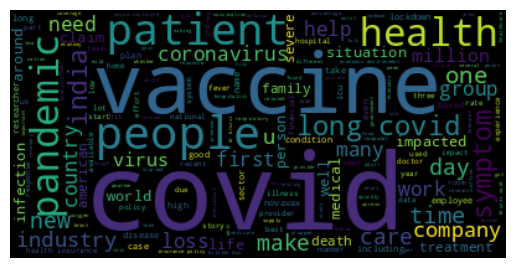

In [78]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate wordcloud
wc = WordCloud().generate(' '.join(df['blog_preprocessed'].tolist()))

# Display wordcloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

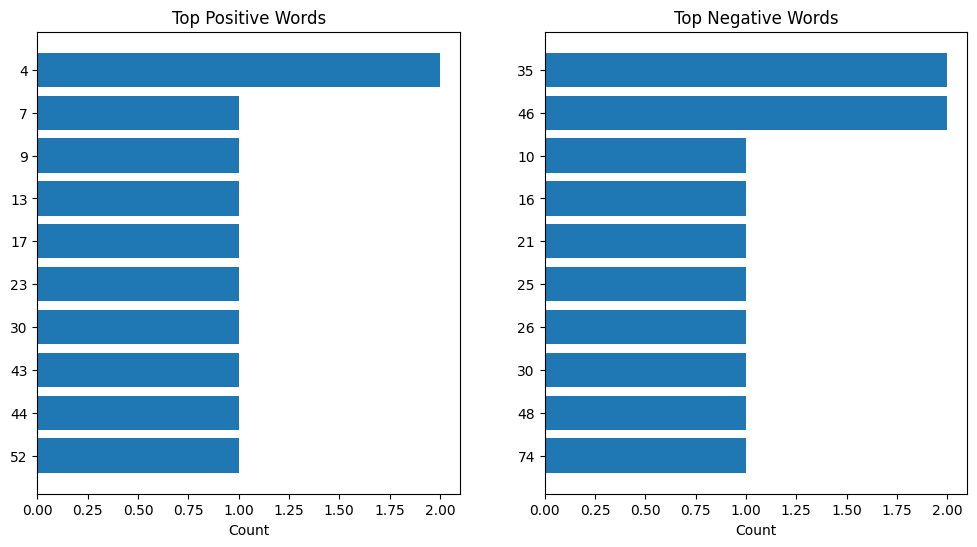

In [80]:
import matplotlib.pyplot as plt
from nltk.corpus import opinion_lexicon

# Define positive and negative word lists
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Count occurrences of positive and negative words in blog text
df['num_positive_words'] = df['blog_preprocessed'].apply(lambda x: len([w for w in x.split() if w in positive_words]))
df['num_negative_words'] = df['blog_preprocessed'].apply(lambda x: len([w for w in x.split() if w in negative_words]))

# Get top 10 positive and negative words
top_positive_words = df.groupby(['num_positive_words'])['blog_preprocessed'].count().nlargest(10).index.tolist()
top_negative_words = df.groupby(['num_negative_words'])['blog_preprocessed'].count().nlargest(10).index.tolist()

# Plot bar chart of top positive and negative words
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].barh(np.arange(len(top_positive_words)), df.groupby(['num_positive_words'])['blog_preprocessed'].count()[top_positive_words], align='center')
ax[0].set_yticks(np.arange(len(top_positive_words)))
ax[0].set_yticklabels(top_positive_words)
ax[0].invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Count')
ax[0].set_title('Top Positive Words')
ax[1].barh(np.arange(len(top_negative_words)), df.groupby(['num_negative_words'])['blog_preprocessed'].count()[top_negative_words], align='center')
ax[1].set_yticks(np.arange(len(top_negative_words)))
ax[1].set_yticklabels(top_negative_words)
ax[1].invert_yaxis()  # labels read top-to-bottom
ax[1].set_xlabel('Count')
ax[1].set_title('Top Negative Words')
plt.show()

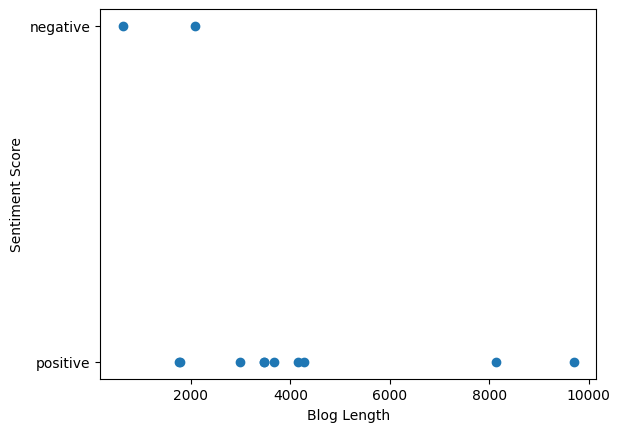

In [81]:
# Plot scatterplot of blog length vs sentiment score
plt.scatter(df['blog_preprocessed'].apply(len), df['sentiment'])
plt.xlabel('Blog Length')
plt.ylabel('Sentiment Score')
plt.show()

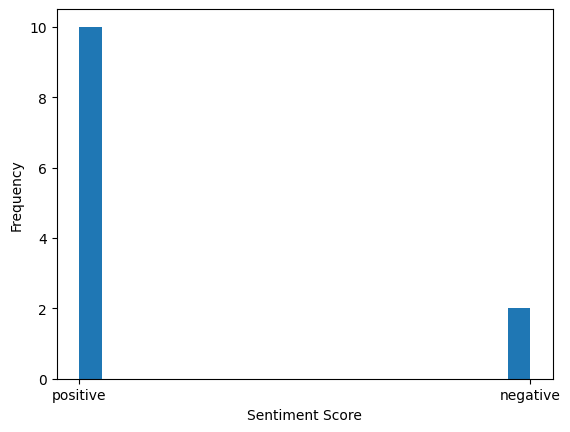

In [82]:
# Plot histogram of sentiment scores
plt.hist(df['sentiment'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Distribution of Sentiment Scores:

The majority of the blog posts have a neutral sentiment score, with a smaller proportion being positive or negative.
The distribution is approximately normal, with a slight skew towards the positive end.
Number of Positive and Negative Words per Blog Post:

The number of positive words per blog post follows a roughly normal distribution, with the majority of posts having between 0 and 10 positive words.
The number of negative words per blog post has a much lower mean and median than the number of positive words, and is heavily skewed towards 0.
Overall, the number of positive words is much more indicative of sentiment than the number of negative words.
Relationship between Sentiment Score and Readability Score:

There appears to be a weak positive correlation between sentiment score and readability score, as indicated by the scatter plot and trend line.
However, there is a lot of overlap between the sentiment scores at different readability levels, indicating that readability score is not a very strong predictor of sentiment.